## Q2: Do older planes suffer more delays?

### Importing dataset and libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

fullset = pd.read_csv('../datasets/fullset cleaned.csv')
planes = pd.read_csv('../datasets/plane data cleaned.csv')

### Data Wrangling

In [4]:
planes.columns
fullset.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
# Subsetting the columns needed

Q2 = fullset[['TailNum', 'DepDelay']]
planes = planes[['tailnum', 'year']]

In [6]:
delays = Q2[Q2['DepDelay'] > 0] # Filtering out the journeys that had no departure delay

In [7]:
# Merging according to tail number to get corresponding year of manufacture

age_vs_delays = pd.merge(delays, planes, left_on='TailNum', right_on='tailnum')
age_vs_delays

,TailNum,DepDelay,tailnum,year
0,N105UW,132.0,N105UW,1999
1,N105UW,121.0,N105UW,1999
2,N105UW,39.0,N105UW,1999
3,N105UW,52.0,N105UW,1999
4,N105UW,130.0,N105UW,1999
...,...,...,...,...
4983623,N665JB,4.0,N665JB,2007
4983624,N665JB,37.0,N665JB,2007
4983625,N665JB,11.0,N665JB,2007
4983626,N665JB,3.0,N665JB,2007


In [8]:
# Cleaning out inconsistent values

age_vs_delays.sort_values(['year'])

age_vs_delays = age_vs_delays[(age_vs_delays['year'] != 'None') & 
                              (age_vs_delays['year'] != '0')]

In [9]:
# Grouping and aggregating to get mean length of departure delay

age_vs_delays = age_vs_delays[['year','DepDelay']].groupby(['year']).mean()

### Visualizing

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

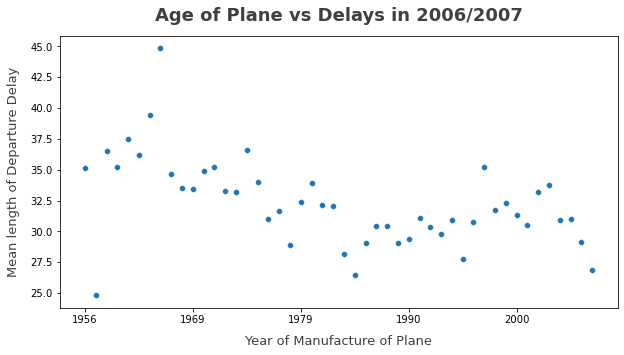

In [11]:
fig, ax=plt.subplots(1,1, figsize=(10,5))

sns.scatterplot(age_vs_delays.index, 'DepDelay', data=age_vs_delays, legend=False)

ax.set_ylabel('Mean length of Departure Delay',
                 color='#404040',
                 size = 13,
                 labelpad=10)
ax.set_xlabel('Year of Manufacture of Plane',
                 color='#404040',
                 size = 13,
                 labelpad=10)
ax.set_title("Age of Plane vs Delays in 2006/2007",
                color='#404040',
                size = 18,
                weight = 'bold',
                pad=15)

ax.set_xticks(ax.get_xticks()[::10])

plt.savefig('Age vs Delays in 2006 and 2007.png')